# Stack Overflow Annual Developer Survey from 2019

# Germany, UK or USA where should I start my career as SW developer?

## Business Understanding

Germany, UK or USA where should I start my career as SW developer? To answer this question, the following questions needed to be answered using the data of Stackoverflow’s 2019 Annual Developer Survey.
* Question 1: What is the salary of each location?
* Question 2: Salary development over experience
* Question 3: What is the job satisfaction over years of experience?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set()
%matplotlib inline

## Data Understanding

Reading Stackoverflow’s 2019 Annual Developer Survey in a pandas dataframe and print out the first rows to get a first understanding how the data looks like

In [28]:
df_2019 = pd.read_csv('./2019Survey/survey_results_public.csv')

In [29]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [30]:
# Data Understanding
def Bar_plot(df, column, title):
    """
    Plots a bar chart
    
    Parameters:
    df: a dataframe
    column: column of interest to plot
    title: title of the plot
    
    Returns:
    none    
    """
    
    df_2019_bar_plot=df[column].value_counts()
    df_2019_bar_plot[:5].plot(kind="bar");
    plt.ylabel(column);
    plt.title(title); 

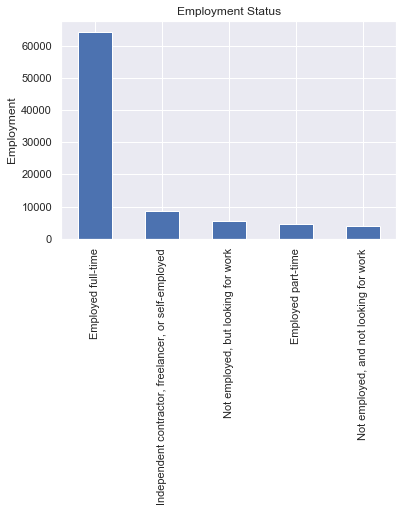

In [31]:
# Plot of Employment Status
Bar_plot(df_2019, "Employment", "Employment Status")

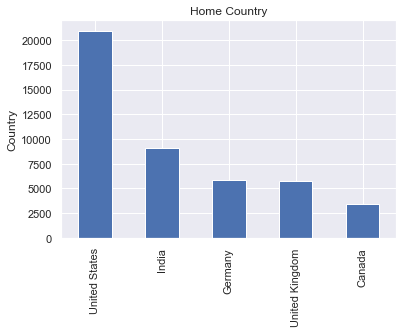

In [26]:
# Plot of home country 
Bar_plot(df_2019, "Country", "Home Country")

## Data preparation

#### Select columns of interest to be able to answer the questions mentioned above

In [32]:
columns=['Respondent', 'Country', 'YearsCode', 'EdLevel', 'CareerSat', 'ConvertedComp']

In [33]:
df_2019=df_2019[columns].copy()

#### Filter in column Country the three countries of interest (Germany, UK and US)

In [34]:
df_2019=df_2019[df_2019['Country'].isin(["Germany", "United Kingdom", "United States"])]

In [35]:
df_2019.Country.unique()

array(['United Kingdom', 'United States', 'Germany'], dtype=object)

#### To be able to convert column "YearsCode" to a numeric dtype we need to replace "Less than 1 year" to 1 and "More than 50 years" to 50

In [36]:
df_2019.loc[df_2019['YearsCode']=='Less than 1 year','YearsCode']=1

In [37]:
df_2019.loc[df_2019['YearsCode']=='More than 50 years','YearsCode']=50

Droping all "nan" entries in column "YearsCode"

In [38]:
df_2019.dropna(subset=["YearsCode"], inplace=True)

Transforming entries in column "YearsCode" from dtype object to dtype int64 for further analysis

In [39]:
df_2019.YearsCode.unique()

array(['4', '3', '17', '13', '10', '35', '12', '14', '30', '26', '40',
       '19', '5', '28', '15', '9', '22', '1', '16', '7', '11', '8', '20',
       '50', '41', '25', '23', '6', '2', '42', '18', '21', 1, '24', '39',
       '31', '38', '34', '33', '37', '32', '36', '29', '27', '45', '44',
       '43', 50, '47', '49', '46', '48'], dtype=object)

In [40]:
df_2019['YearsCode']=pd.to_numeric(df_2019['YearsCode'])

In [41]:
df_2019.YearsCode.unique()

array([ 4,  3, 17, 13, 10, 35, 12, 14, 30, 26, 40, 19,  5, 28, 15,  9, 22,
        1, 16,  7, 11,  8, 20, 50, 41, 25, 23,  6,  2, 42, 18, 21, 24, 39,
       31, 38, 34, 33, 37, 32, 36, 29, 27, 45, 44, 43, 47, 49, 46, 48],
      dtype=int64)

#### To be able to messure the job satisfaction we need to transform column "CareerSat" to numeric values

In [42]:
def CareerSat_num(df):
    """
    Convert career satisfaction entries to integer values
    
    Parameter:
    df: a dataframe
    
    Returns:
    df: converted dataframe
    
    
    """
    CareerSat_map={'Very satisfied':5,
                  'Slightly satisfied':4,
                  'Neither satisfied nor dissatisfied':3,
                  'Slightly dissatisfied':2,
                  'Very dissatisfied':1}
    df.dropna(subset=["CareerSat"], inplace=True)
    df['CareerSat']=df['CareerSat'].apply(lambda x: CareerSat_map[x])
    return df

#### Define barplot function for salary

In [55]:
def barplot_groupby(df, groupby, column,  title):
    """
    Plots a bar chart
    
    Parameters:
    df: a dataframe
    groupby: coloumns to group
    column: column of interest to plot
    title: title of the plot
    
    Returns:
    none    
    """
    df_plot=df.groupby([groupby])[column].median().reset_index()
    sns.barplot(x=groupby, y=column, data=df_plot)
    plt.ylabel(column)
    plt.title(title)

#### Define barplot function for salary and education level

In [60]:
def barplot_groupby_hue(df, groupby, column, col_hue,  title):
    """
    Plots a bar chart
    
    Parameters:
    df: a dataframe
    groupby: columns to group
    col_hue: 2nd columns to group by
    column: column of interest to plot
    title: title of the plot
    
    Returns:
    none    
    """
    df_plot=df.groupby([groupby, col_hue])[column].median().reset_index()
    sns.barplot(x=groupby, y=column, hue=col_hue, data=df_plot)
    plt.ylabel(column)
    plt.title(title)

## Evaluate the Results

### Question 1: What is the salary of each location?

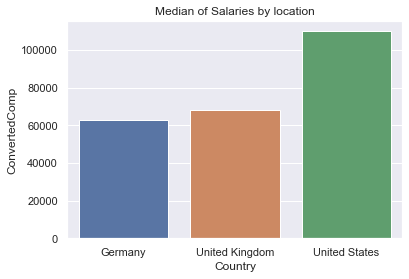

In [48]:
df_2019_salary=df_2019[df_2019['ConvertedComp'].notnull()].copy()
barplot_groupby(df_2019_salary, 'Country', 'ConvertedComp', 'Median of Salaries by location')

The graph shows us that both Germany and UK have similar salary expectation and that the United States has by far the highest salary expectation for a SW developer

Let's look into it in more detail, is there a difference in salary between the education levels

#### Calculating the median of the salaries for each education level in every country

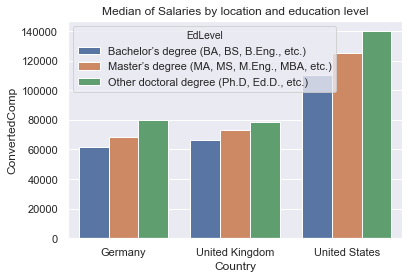

In [63]:
df_2019_salary_academics=df_2019_salary[df_2019_salary['EdLevel'].isin(["Bachelor’s degree (BA, BS, B.Eng., etc.)",
                                                                                           "Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"])]
barplot_groupby_hue(df_2019_salary_academics, 'Country','ConvertedComp', 'EdLevel', 'Median of Salaries by location and education level')

Here is a similar picture to what we had before. The United States is outperforming both Germany and UK and it doesn’t matter if you are holding different education level.

## Question 2: Salary development over experience

In [64]:
df_2019_salary.dropna(subset=["YearsCode"], inplace=True)

#### Calculate the median of the salaries over experience for each location

In [65]:
df_2019_salary=df_2019_salary.groupby(['Country', 'YearsCode'])['ConvertedComp'].median().reset_index()

In [66]:
df_2019_salary_development_uk=df_2019_salary[df_2019_salary['Country']=='United Kingdom'].copy()
df_2019_salary_development_uk['pctChange']=df_2019_salary_development_uk['ConvertedComp'].pct_change().cumsum()

In [67]:
df_2019_salary_development_us=df_2019_salary[df_2019_salary['Country']=='United States'].copy()
df_2019_salary_development_us['pctChange']=df_2019_salary_development_us['ConvertedComp'].pct_change().cumsum()

In [68]:
df_2019_salary_development_de=df_2019_salary[df_2019_salary['Country']=='Germany'].copy()
df_2019_salary_development_de['pctChange']=df_2019_salary_development_de['ConvertedComp'].pct_change().cumsum()

In [69]:
df_2019_salary_development_all=pd.concat([df_2019_salary_development_uk, df_2019_salary_development_us, df_2019_salary_development_de])

In [70]:
df_2019_salary_development_all.dropna(subset=["pctChange"], inplace=True)

In [521]:
df_2019_salary_development_all=df_2019_salary_development_all[df_2019_salary_development_all['YearsCode']<35]

#### Line plot of the percentage change for each location over years of experience

Text(0.5, 0, 'Years of experience')

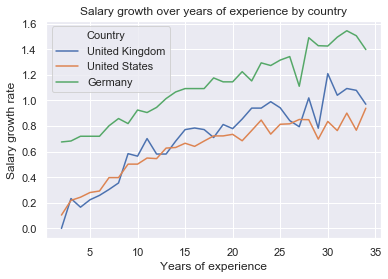

In [522]:
ax=sns.lineplot(x="YearsCode", y="pctChange", hue="Country", data=df_2019_salary_development_all)
plt.title('Salary growth over years of experience by country')
plt.ylabel('Salary growth rate')
plt.xlabel('Years of experience')

This graph shows us that all the three countries UK, Germany and US have a similar growth rate. The offset between Germany and the other two countries comes from the data where we could see a high salary growth rate for the first year but then after the first years all countries have similar salary growth rates.

## Question 3: What is the job satisfaction over years of experience?

Transform column "CareerSat" to numeric values

In [506]:
CareerSat_num(df)

Select all entries smaller than 35 years of experience

In [518]:
df_2019_satisfacation=df_2019_satisfacation[df_2019_satisfacation['YearsCode']<35]

Calculate the median of the job satisfaction

In [519]:
df_2019_satisfacation=df_2019_satisfacation.groupby(['Country', 'YearsCode'])['CareerSat'].median().reset_index()

Plot the result

Text(0.5, 1.0, 'Median of Jobsatisfaction by location and job experience')

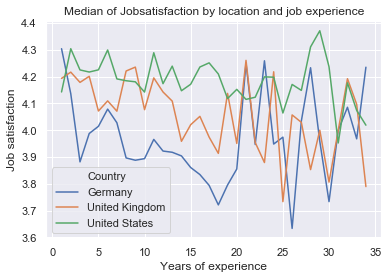

In [520]:
sns.lineplot(x="YearsCode", y="CareerSat", hue="Country", data=df_2019_satisfacation)
plt.xlabel('Years of experience')
plt.ylabel('Job satisfaction')
plt.title('Median of Jobsatisfaction by location and job experience')

We can see that all three countries have the same job satisfaction level at the beginning but a drop or can we say the disappointment of the SW developer in UK or Germany comes early. After the start both countries UK and Germany show us a drop in job satisfaction. This drop settles down after some years but it will not achieve the job satisfaction you have in the US.